# W3 Lab Assignment

Submit the .ipynb file to Canvas with file name `w03_lab_lastname_firstname.ipynb`.

In this lab, we will introduce [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html) and continue to use the `imdb.csv` file from the last lab.

There will be some exercises, and as usual, write your code in the empty cells to answer them.


## Importing libraries

I think some of you have already used `pandas`. Pandas is a library for high-performance data analysis, and makes  tedious jobs of reading, manipulating, analyzing data super easy and nice. You can even plot directly using `pandas`. If you used R before, you'll see a lot of similarity with the R's dataframe and pandas's dataframe. 

In [ ]:
import pandas as pd  
import numpy as np

### Matplotlib magic

`Jupyter` notebook provides several [**magic** commands](https://ipython.org/ipython-doc/dev/interactive/tutorial.html#magic-functions). These are the commands that you can use only in the notebook (not in IDLE for instance). One of the greatest magic command is `matplotlib inline`, which displays plots within the notebook instead of creating figure files. 

In [ ]:
%matplotlib inline 

There are many ways to import `matplotlib`, but the most common way is:

In [ ]:
import matplotlib.pyplot as plt 

# Q1: Revisting W2 lab

Let's revisit last week's exercise with `pandas`. It's very easy to read `CSV` files with `pandas`, using the [**`panda.read_csv()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function has many many options and it may be worthwhile to take a look at available options. Things that you need to be careful are: 

1. `delimiter` or `sep`: the data file may use ',', tab, or any weird character to separate fields. You can't read data properly if this option is incorrect. 
1. `header`: some data files have "header" row that contains the names of the columns. If you read it as data or use the first row as the header, you'll have problems. 
1. `na_values` or `na_filter`: often the dataset is incomplete and contains missing data (`NA`, `NaN` (not a number), etc.). It's very important to take care of them properly. 

You don't need to create dictionaries and other data structures. `Pandas` just imports the whole table into a data structure called [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). You can do all kinds of interesting manipulation with the `DataFrame`. 

In [ ]:
df = pd.read_csv('imdb.csv', delimiter='\t')

Let's look at the first few rows to get some sense of the data. 

In [ ]:
df.head()

You can see more, or less lines of course

In [ ]:
df.head(2)

You can extract one column by using dictionary-like expression

In [ ]:
df['Year'].head(3)

or select multiple columns

In [ ]:
df[['Year','Rating']].head(3)

To get the first 10 rows

In [ ]:
df[:10]

We can also select both rows and columns. For example, to select the first 10 rows of the 'Year' and 'Rating' columns:

In [ ]:
df[['Year','Rating']][:10]

You can swap the order of rows and columns. 

But, when you deal with large datasets, You may want to stick to this principle: 

> Try to reduce the size of the dataset you are handling as soon as possible, and as much as possible. 

For instance, if you have a billion rows with three columns, getting the small row slice (`df[:10]`) and working with this small slice can be much better than getting the column slice (`df['Year']`) and working with this slice (still contains billion items). 

In [ ]:
df[:10][['Year','Rating']]

It is very easy to answer the question of the number of movies per year. The [**`value_counts()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) function counts how many times each data value (year) appears. 

In [ ]:
print( min(df['Year']), df['Year'].min(), max(df['Year']), df['Year'].max() )
year_nummovies = df["Year"].value_counts()
year_nummovies.head()

To calculate average ratings and votes

In [ ]:
print( np.mean(df['Rating']), np.mean(df['Votes']) )

or you can even do 

In [ ]:
print( df['Rating'].mean() )

To get the median ratings of movies in 1990s, we first select only movies in that decade

In [ ]:
geq = df['Year'] >= 1990
leq = df['Year'] <= 1999
movie_nineties = df[geq & leq]

In [ ]:
movie_nineties.head()

Then, we can do the calculation

In [ ]:
print( movie_nineties['Rating'].median(), movie_nineties['Votes'].median() )

Finally, if we want to know the top 10 movies in 1990s, we can use the [**`sort()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort.html) function:

In [ ]:
sorted_by_rating = movie_nineties.sort('Rating', ascending=False)
sorted_by_rating[:10]

### Exercise

Calculate the following basic characteristics of ratings of movies only in 1994: 10th percentile, median, mean, 90th percentile.


* http://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html
* http://pandas.pydata.org/pandas-docs/stable/text.html

Write your code in the cell below

In [4]:
# Q1: Calculate the following basic characteristics of ratings of movies 
# only in 1994: 10th percentile, median, mean, 90th percentile.

import pandas as pd
import numpy as np

df = pd.read_csv('imdb.csv', delimiter='\t')
selector =  df['Year'] == 1994
moviesFrom1994 = df[selector]
ratings = moviesFrom1994['Rating']

ratings10thPercentile = np.percentile(ratings, 10)
ratingsMedian = np.median(ratings)
ratingsMean = np.mean(ratings)
ratings90thPercentile = np.percentile(ratings, 90)

print("1994 movie ratings, \n\tmean: {} \n\tmedian: {} \n\t10th-percentile: {} \n\t90th-percentile: {}".format(ratingsMean, ratingsMedian, ratings10thPercentile, ratings90thPercentile))


1994 movie ratings, 
	mean: 6.208550512445095 
	median: 6.4 
	10th-percentile: 4.2 
	90th-percentile: 7.959999999999991


# Q2: Basic plotting with pandas

`Pandas` provides some easy ways to draw plots by using `matplotlib`. `Dataframe` object has several plotting functions. For instance, 

In [ ]:
df['Year'].hist()

### Exercise

Can you plot the histogram of ratings of the movies between 2000 and 2014?

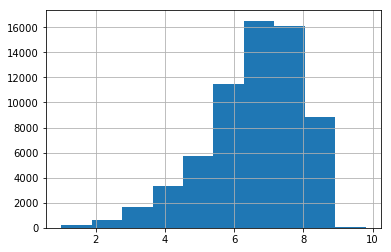

In [6]:
# Q2: plot the histogram of ratings of the movies between 2000 and 2014

%matplotlib inline 

selector1 = df['Year'] >= 2010
selector2 = df['Year'] <= 2014
moviesFrom2010to2014 = df[selector1 & selector2]
moviesFrom2010to2014['Rating'].hist()


# Q3: Basic plotting with matplotlib

Let's plot the histogram of ratings using the [**`pyplot.hist()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function.

In [ ]:
plt.hist(df['Rating'], bins=10)

### Exercise

Let's try to make some style changes to the plot:

* change the color from blue to whatever you want
  - http://matplotlib.org/users/pyplot_tutorial.html#working-with-text
  - http://matplotlib.org/api/colors_api.html
* add labels of x and y axis
* change the number of bins to 20

(array([  2.74000000e+02,   5.50000000e+02,   1.40500000e+03,
          1.95800000e+03,   4.34000000e+03,   5.16500000e+03,
          9.75500000e+03,   1.14520000e+04,   2.05740000e+04,
          2.19260000e+04,   2.76360000e+04,   4.17550000e+04,
          3.75340000e+04,   4.89360000e+04,   2.93760000e+04,
          2.86830000e+04,   1.50620000e+04,   6.47600000e+03,
          1.38000000e+02,   1.60000000e+01]),
 array([ 1.   ,  1.445,  1.89 ,  2.335,  2.78 ,  3.225,  3.67 ,  4.115,
         4.56 ,  5.005,  5.45 ,  5.895,  6.34 ,  6.785,  7.23 ,  7.675,
         8.12 ,  8.565,  9.01 ,  9.455,  9.9  ]),
 <a list of 20 Patch objects>)

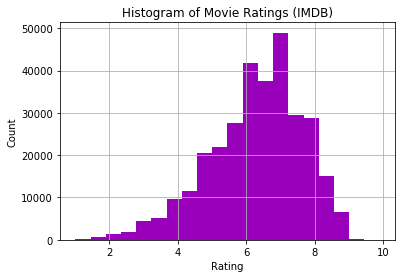

In [35]:
# Q3: plot the histogram of ratings using the pyplot.hist() function
# (1) change the color from blue to whatever you want
# (2) add labels of x and y axis
# (3) change the number of bins to 20

import matplotlib.pyplot as plt

numberOfBins = 20
barColor = '#9900bb'

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Movie Ratings (IMDB)')
plt.grid(True)
plt.hist(df['Rating'], bins=numberOfBins, color=barColor)

# Q4: Basic plotting with Seaborn

Seaborn sits on the top of matplotlib and makes it easier to draw statistical plots. Most plots that you create with Seaborn can be created with matplotlib. It just typically requires a lot more work. 

Be sure seaborn has been installed on your computer, otherwise run

`conda install seaborn`

In [ ]:
import seaborn as sns

Let's do nothing and just run the histgram again

In [ ]:
plt.hist(df['Rating'], bins=10)

We can use the [**`distplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html) function to plot the histogram.

In [ ]:
sns.distplot(df['Rating'])

### Exercise

Read the document about the function and make the following changes: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html

* change the number of bins to 10;
* not to show kde;

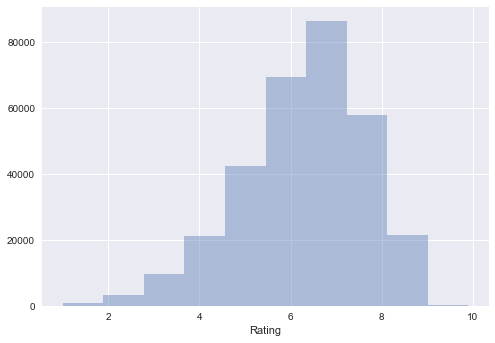

In [39]:
# Q4: use Seaborn distplot()
# (1) change the number of bins to 10
# (2) do not show kde

import seaborn as sns

numberOfBins = 10
sns.distplot(df['Rating'], bins=numberOfBins, kde=False)